In [1]:
import matplotlib.pyplot as plt
from qurveros.qubit_bench import noisetools
import numpy as np
import pandas as pd

In [2]:
def noise_generation_test(num_realizations, n_points, alpha, seed=0):
    """
    Tests the PSD and moments of the generated noise. The test is currently
    limited to visual validation.
    """

    rng = np.random.default_rng(seed)

    if alpha == 0:
        noise_in = noisetools.get_white_noise_array(
            num_realizations=num_realizations, n_points=n_points, rng=rng
        )

    else:
        noise_in = noisetools.get_colored_noise_array(
            num_realizations=num_realizations, n_points=n_points, alpha=alpha, rng=rng
        )

    log_ang_freqs, log_psd = noisetools.estimate_psd(noise_in)
    log_ang_freqs_whitened, log_psd_whitened = noisetools.estimate_psd(
        noise_in, prewhiten=True
    )

    fig, axs = plt.subplots(
        2, 2, figsize=(6, 4), gridspec_kw={"wspace": 0.4, "hspace": 0.0}, sharex="col"
    )

    fig.suptitle(rf"Noise generation $\alpha=${alpha}", x=0.5, y=1.04)

    # PSD test
    axs[0, 0].plot(log_ang_freqs, log_psd, label="Estimated PSD")
    axs[0, 0].plot(log_ang_freqs, -alpha * log_ang_freqs, label="Analytic PSD")
    axs[0, 0].legend()
    axs[0, 0].set_ylabel("Log Amplitude (a.u)")

    axs[1, 0].plot(log_ang_freqs_whitened, log_psd_whitened, label="Estimated PSD")
    axs[1, 0].plot(
        log_ang_freqs_whitened,
        (2 - alpha) * log_ang_freqs_whitened,
        label="Analytic PSD",
    )
    axs[1, 0].legend()
    axs[1, 0].set_ylabel("Log Amplitude (a.u)")

    axs[1, 0].set_xlabel(r"Frequency [$\log_{10}({T_g\omega})$]")

    # Stationarity test
    times = np.linspace(0, 1, noise_in.shape[1])

    axs[0, 1].plot(times, noise_in.mean(axis=0))
    axs[0, 1].set_ylabel("Mean (a.u)")

    axs[1, 1].plot(times, noise_in.var(axis=0))
    axs[1, 1].set_ylabel("Variance (a.u)")
    axs[1, 1].set_xlabel(r"Time $t/T_g$")

    df = pd.DataFrame(noise_in[:, ::1000])
    ax = df.plot.kde(title="Noise Kernel Density Estimation")
    ax.set_xlabel("X")

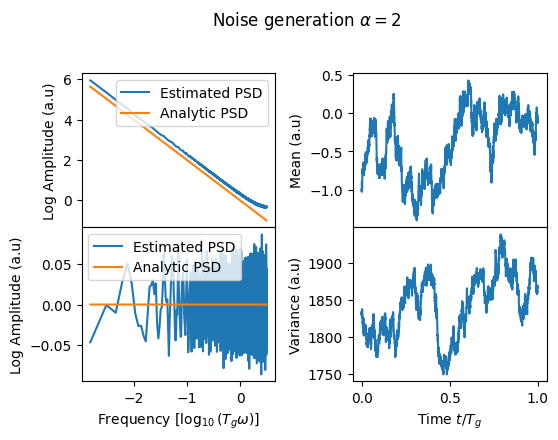

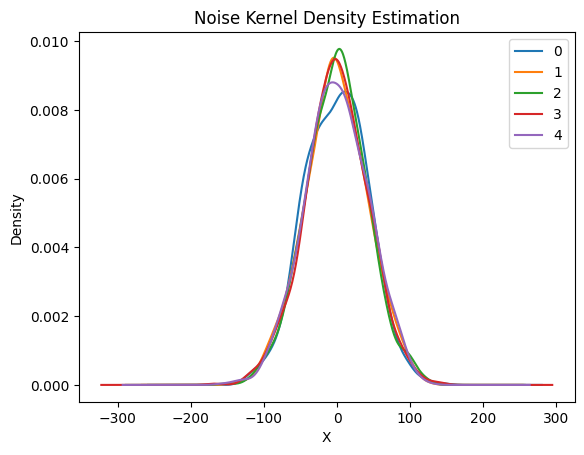

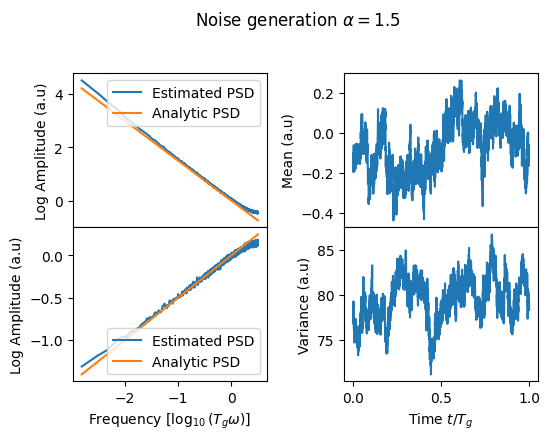

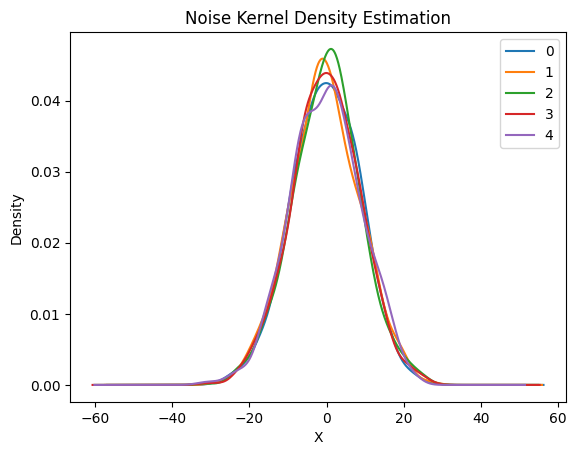

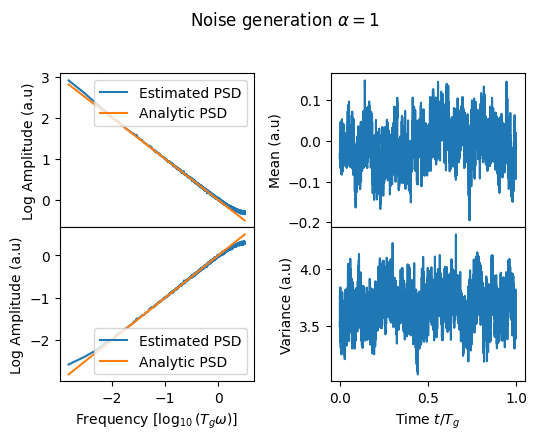

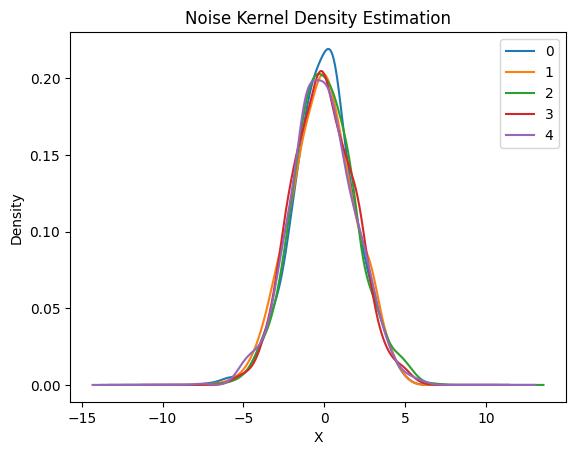

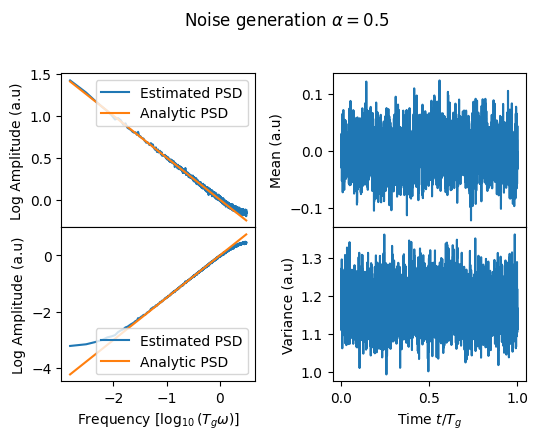

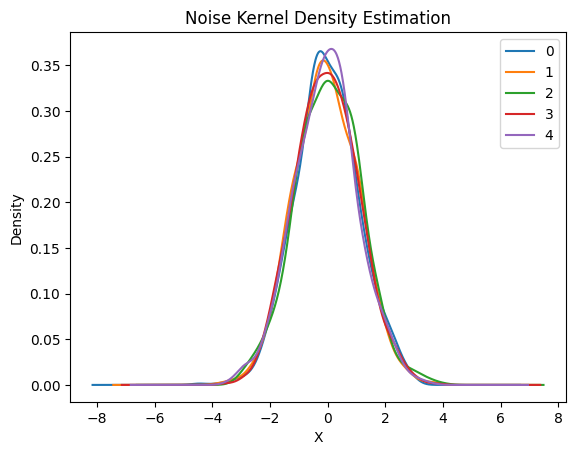

In [3]:
for alpha in [2, 1.5, 1, 0.5]:
    noise_generation_test(1000, 4096, alpha)